In [0]:
import matplotlib.pyplot as plt
import numpy as np

#Functions

In [0]:
def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x)) 

def accuracy_deviation(confusion_mat):
  mean_accuracy=(confusion_mat[0,0]+confusion_mat[1,1])/(confusion_mat[0,0]+confusion_mat[0,1]+confusion_mat[1,0]+confusion_mat[1,1])
  return(print(np.round(mean_accuracy*100,3),'%'))




In [0]:
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img1=img[:,:,0]
            images.append(img1)
    return images


def resize_img(img_array):
  resized_images=[]
  for i in range(len(img_array)):
    img=np.asarray(img_array[i])[180:360,250:530]
    k1=cv2.resize(img,(30,30))
    k=np.asarray(k1).reshape((1,30*30))
    resized_images.append(k)
  return(resized_images)

#Training and Testing Data

In [0]:
nonSpecs_train=load_images_from_folder('/content/drive/My Drive/Images/nonSpecs_train')


nonSpecs_test=load_images_from_folder('/content/drive/My Drive/Images/nonSpecs_test')


specs_train=load_images_from_folder('/content/drive/My Drive/Images/specs_train')


specs_test=load_images_from_folder('/content/drive/My Drive/Images/specs_test')

In [0]:
j=np.asarray(resize_img(nonSpecs_train))
nonSpecs_train_r=j.reshape((j.shape[0],j.shape[2]))

k=np.asarray(resize_img(nonSpecs_test))
nonSpecs_test_r=k.reshape((k.shape[0],k.shape[2]))

l=np.asarray(resize_img(specs_train))
specs_train_r=l.reshape((l.shape[0],l.shape[2]))

m=np.array(resize_img(specs_test))
specs_test_r=m.reshape((m.shape[0],m.shape[2]))



In [0]:
y0=np.zeros((len(nonSpecs_train_r),1))
nonSpecs_train_label=np.concatenate((nonSpecs_train_r,y0),axis=1)
y1=np.ones((len(specs_train_r),1))
specs_train_label=np.concatenate((specs_train_r,y1),axis=1)

y01=np.zeros((len(nonSpecs_test_r),1))
nonSpecs_test_label=np.concatenate((nonSpecs_test_r,y01),axis=1)
y11=np.ones((len(specs_test_r),1))
specs_test_label=np.concatenate((specs_test_r,y11),axis=1)


train_data=np.concatenate((nonSpecs_train_label,specs_train_label),axis=0)
np.random.shuffle(train_data)
test_data=np.concatenate((nonSpecs_test_label,specs_test_label),axis=0)
np.random.shuffle(test_data)


#Model

In [0]:
##Neural Network
#MLPC=Multilayer perceptron Classifier
#Training Data 1 
from sklearn.neural_network import MLPClassifier
from sklearn import svm,metrics

clf = MLPClassifier(solver='adam', alpha=0.0001,hidden_layer_sizes=(128,128,128,64,1), activation='logistic',max_iter=10000)
clf.fit(train_data[:,0:-1]/255.0, train_data[:,-1])
y_pred_nn1=clf.predict(test_data[:,0:-1]/255.0)
y_pred_nn=y_pred_nn1.reshape((len(y_pred_nn1),1))
cm=metrics.confusion_matrix(test_data[:,-1],np.asarray(y_pred_nn))
probs=clf.predict_proba(test_data[:,0:-1])
print(cm)

[[ 36 112]
 [ 82 104]]


#Evaluation Metrics

##Accuracy

In [0]:
accuracy_deviation(cm)

41.916 %


##ROC

In [0]:
def tpr_fpr(arr,thresh):
  x=[]
  for k in range(len(thresh)):
    t=thresh[k]
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(arr)):  
      if (arr[i,0]==1 and (arr[i,2]==t or arr[i,2]>t )):
        tp+=1
      elif (arr[i,0]==0 and (arr[i,2]==t or arr[i,2]>t)):
        fp+=1
      elif (arr[i,0]==0 and arr[i,2]<t):
        tn+=1
      else :
        fn+=1
    x.append(tp/(tp+fn))
    x.append(fp/(tn+fp))
  return(x)


def precision_recall(arr,thresh):
  x=[]
  for k in range(len(thresh)):
    t=thresh[k]
    tp=0
    fp=0
    tn=0
    fn=0
    for i in range(len(arr)):  
      if (arr[i,0]==1 and (arr[i,2]==t or arr[i,2]>t )):
        tp+=1
      elif (arr[i,0]==0 and (arr[i,2]==t or arr[i,2]>t)):
        fp+=1
      elif (arr[i,0]==0 and arr[i,2]<t):
        tn+=1
      else :
        fn+=1
    x.append(tp/(tp+fp))
    x.append(tp/(tp+fn))
  return(x)

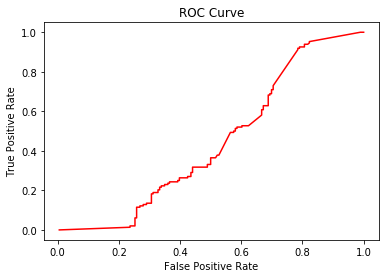

In [0]:
from matplotlib import pyplot as plt
roc_matrix_nn=np.concatenate((test_data[:,-1].astype(int).reshape((334,1)),y_pred_nn.reshape((334,1)),probs[:,0].reshape((334,1))),axis=1)
one_mat_nn=[]
seven_mat_nn=[]
for i in range(len(roc_matrix_nn)):
  if (roc_matrix_nn[i,0]==1):
    one_mat_nn.append(roc_matrix_nn[i,:])
  else:
    seven_mat_nn.append(roc_matrix_nn[i,:])
thresh_mat_nn=np.unique(np.concatenate((np.asarray(one_mat_nn)[:,-1],np.asarray(seven_mat_nn)[:,-1]),axis=0))
thresh_matrix_nn=np.sort(thresh_mat_nn[::-1].T).reshape((len(thresh_mat_nn),1))[::-1]
sequence_arr_nn=np.concatenate((np.asarray(one_mat_nn)[:,:],np.asarray(seven_mat_nn)[:,:]),axis=0)

c_nn=np.asarray(tpr_fpr(sequence_arr_nn,thresh_matrix_nn))
final_roc_mat_nn=c_nn.reshape((int(len(c_nn)/2),2))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(final_roc_mat_nn[:,0],final_roc_mat_nn[:,1],'r')   
plt.show()

##AUC

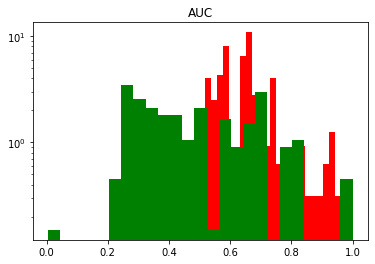

In [0]:
mu, sigma = 0.5, 0.1
plt.title('AUC')
count1,bins1,ignored1=plt.hist(final_roc_mat_nn[:,0],25,density=True,color='r',label='TPR',log=True)
count2,bins2,ignored2=plt.hist(final_roc_mat_nn[:,1],25,density=True,color='g',label='FPR',log=True)
plt.show()

##Precision vs. Recall


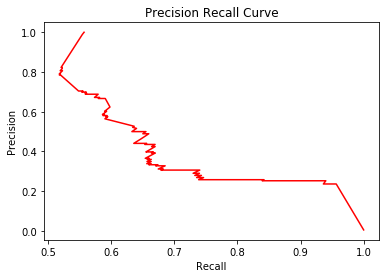

In [0]:
c_nn=np.asarray(precision_recall(sequence_arr_nn,thresh_matrix_nn))
final_roc_mat_nn=c_nn.reshape((int(len(c_nn)/2),2))
plt.title('Precision Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.plot(final_roc_mat_nn[:,0],final_roc_mat_nn[:,1],'r')   
plt.show()

#Mitigation of Bias

##Data Method

In [0]:
more_train=load_images_from_folder('/content/drive/My Drive/more_data')
n=np.asarray(resize_img(more_train))
more_train_r=n.reshape((n.shape[0],n.shape[2]))

y00=np.zeros((len(more_train_r),1))
more_train_label=np.concatenate((more_train_r,y00),axis=1)

train_data_new=np.concatenate((train_data,more_train_label),axis=0)
np.random.shuffle(train_data_new)


##Confusion Matrix

In [0]:
clf1 = MLPClassifier(solver='adam', alpha=0.0001,hidden_layer_sizes=(128,128,128,64,1), activation='logistic',max_iter=10000)
clf1.fit(train_data_new[:,0:-1]/255.0, train_data_new[:,-1])
y_pred_nn11=clf1.predict(test_data[:,0:-1]/255.0)
y_pred_nn1=y_pred_nn11.reshape((len(y_pred_nn11),1))
cm1=metrics.confusion_matrix(test_data[:,-1],np.asarray(y_pred_nn1))
probs1=clf1.predict_proba(test_data[:,0:-1])
print(cm1)

[[106  42]
 [102  84]]


#Accuracy

In [0]:
accuracy_deviation(cm1)

56.886 %


#Bias Mitigation

####Pre-Processing Algorithms
Pre-processing algorithms are used to mitigate bias prevalent in the training data. The idea is to apply one of the following techniques for preprocessing the training data set and then apply classification algorithms for learning an appropriate classifier.

####Reweighing: 
Reweighing is a data preprocessing technique that recommends generating weights for the training examples in each (group, label) combination differently to ensure fairness before classification. The idea is to apply appropriate weights to different tuples in the training dataset to make the training dataset discrimination free with respect to the sensitive attributes. Instead of reweighing, one could also apply techniques (non-discrimination constraints) such as suppression (remove sensitive attributes) or massaging the dataset — modify the labels (change the labels appropriately to remove discrimination from the training data). However, the reweighing technique is more effective than the other two mentioned earlier.
####Optimized preprocessing: 
The idea is to learn a probabilistic transformation that edits the features and labels in the data with group fairness, individual distortion, and data fidelity constraints and objectives.
####Learning fair representations: 
The idea is to find a latent representation that encodes the data well while obfuscating information about protected attributes.
####Disparate impact remover: 
Feature values are appropriately edited to increase group fairness while preserving rank-ordering within groups.
##In-Processing Algorithms
####Adversarial Debiasing: 
A classifier model is learned to maximize prediction accuracy and simultaneously reduce an adversary's ability to determine the protected attribute from the predictions. This approach leads to a fair classifier as the predictions cannot carry any group discrimination information that the adversary can exploit.
####Prejudice remover: 
The idea is to add a discrimination-aware regularization term to the learning objective.


##Post-Processing Algorithms
####Equalized odds postprocessing: 
The algorithm solves a linear program to find probabilities with which to change output labels to optimize equalized odds.
####Calibrated equalized odds postprocessing: 
The algorithm optimizes over calibrated classifier score outputs to find probabilities with which to change output labels with an equalized odds objective.
##Reject option classification
 The idea is to give favorable outcomes to unprivileged groups and unfavorable outcomes to privileged groups in a confidence band around the decision boundary with the highest uncertainty.